In [ ]:
### MACHINE LEARNING: k-nearest neightbors method ###
# k-nearest neighbors method is the the simplest of machine learning algorithms
# objects are classfied by majority vote of its neighbors with the objects being assigned to the class common to neighbors

# k = positive integer, typically small 3,5,10
# knn can do multiple (more than 2) class predictions
# binary (two class) classification problems it is best to use odd numbers for k to avoid ties



In [3]:
## LOAD ALL REQUIRED PYTHON LIBRARIES AND MODULES ##

# Import Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np

# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# Import scikit-Learn module for the algorithm/modeL: Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import scikit-Learn module to split the dataset into train/ test sub-datasets
from sklearn.model_selection import train_test_split

# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Import scikit-Learn module classification report to later use for information about how the
# system try to classify / lable each record
from sklearn.metrics import classification_report

In [4]:
## LOAD DATA ##

# Specify location of the dataset
filename = 'C:/DATASETS/iris.csv'

# Load the data into a Pandas DataFrame
df = pd.read_csv(filename)

In [9]:
## PREPROCESS DATASET ##

# Review for zeros in the value/numerical dtype columns
# XXXXXX ADD METHOD ON HOW TO IDENTIFY ZEROES

print(df.isnull().sum())
print('\n')

# mark zero values as missing or NaN
df[[ 'SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm ' ,'PetalWidthCm' ]] \
= df[['SepalLengthCm' , 'SepalWidthCm' ,'PetalLengthCm' , 'PetalWidthCm' ]].replace(0,np.NaN)

# count the number of NaN values in each column
print (df.isnull().sum())


Id                0
SepalLengthCm     0
SepalWidthCm      0
PetalLengthCm     0
PetalWidthCm      0
Species           0
PetalLengthCm     0
dtype: int64


Id                0
SepalLengthCm     0
SepalWidthCm      0
PetalLengthCm     0
PetalWidthCm      0
Species           0
PetalLengthCm     0
dtype: int64


In [10]:
## EDA STATS ##

# get the dimensions or shape of the dataset
# i.e. number of records / rows X number of variables / columns
print(df.shape)
print('\n')

#get the data types of all the variables / attributes in the data set
print(df.dtypes)
print('\n')

#return the first five records / rows of the data set
print(df.head(5))
print('\n')

#return the summary statistics of the numeric variables / attributes in the data set
print(df.describe())
print('\n')

#class distribution i.e. how many records are in each class
print(df.groupby('Species').size())
print('\n')

(150, 7)


Id                  int64
SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species            object
PetalLengthCm     float64
dtype: object


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   PetalLengthCm   
0             1.4  
1             1.4  
2             1.3  
3             1.5  
4             1.4  


               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count  150.000000     150.000000    150.000000     150.000000    150.000000   
mean    75.500000       5.8433

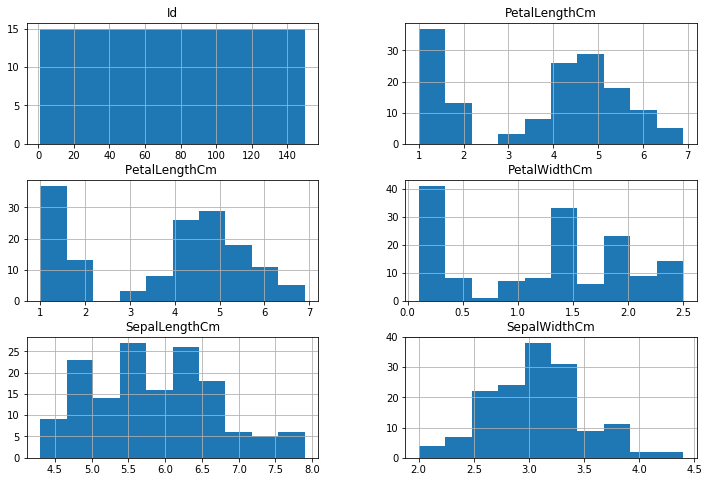

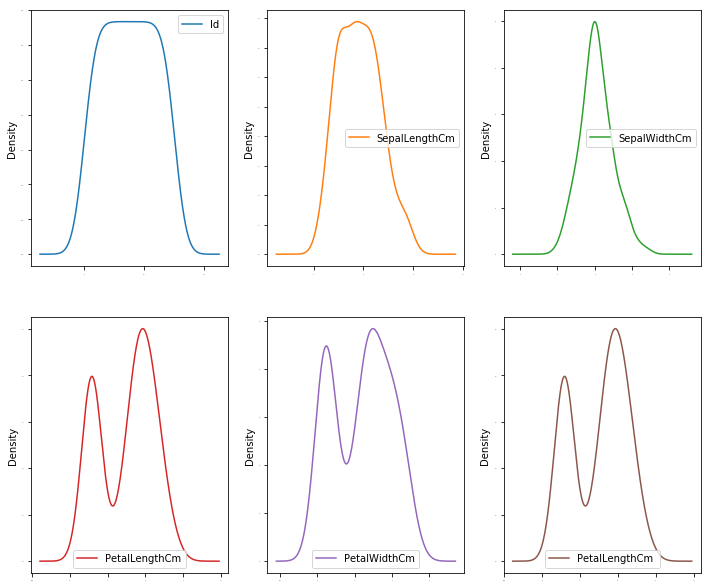

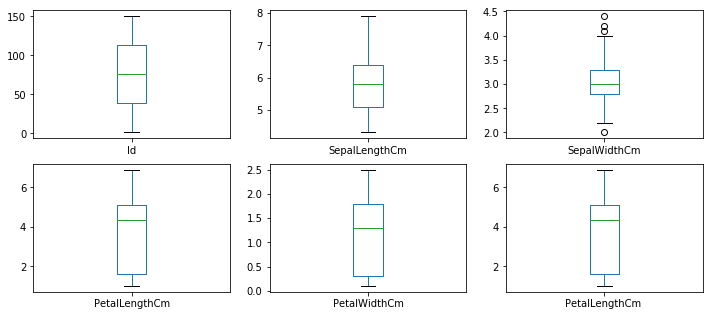

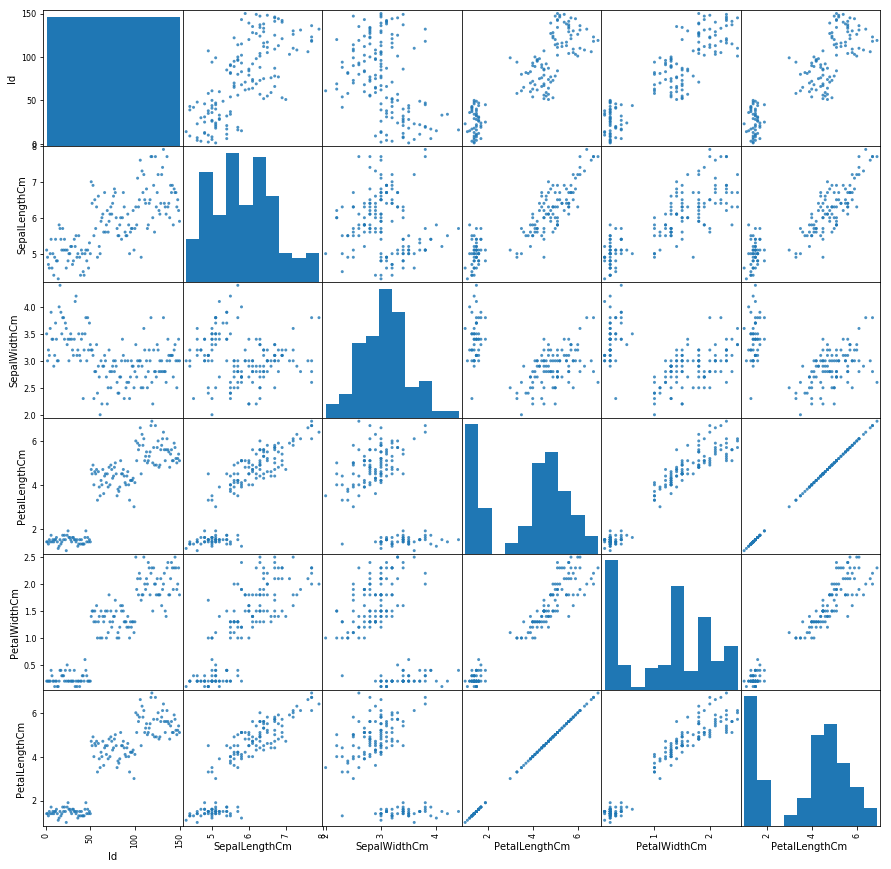

In [11]:
## EDA CHARTS ##

#plot histogram of each numeric variable / attribute in the data set
df.hist(figsize=(12, 8))
pyplot.show()
print('\n')

# generate density plots of each numeric variable / attribute in the data set
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=1,
figsize=(12, 16))
pyplot.show()
print('\n')

# generate box plots of each numeric variable / attribute in the data set
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(12,8))
pyplot.show()
print('\n')

# generate scatter plot matrix of each numeric variable / attribute in the data set
scatter_matrix(df, alpha=0.8, figsize=(15, 15))
pyplot.show()
print('\n')

In [14]:
## SEPARATE DATASET INTO INPUT AND OUTPUT NUMPY ARRAYS ##
# Must split and set the Training Data Set (X)
# and the Desired Outpout Data Set (Y) these are the dependent variable that we are trying to predict

#store dataframe values into a numpy array
array = df.values

# separate array into input and output by slicing
# for X(input) [:, 1:5] --> all the rows, columns from 1 - 4 (5 - 1)
# these are the independent variables or predictors
X = array[:,1:5]

# for Y(input) [:, 5] --> all the rows, column 5
# this is the value we are trying to predict
Y = array[:,5]

In [15]:
## SPLIT INPUT OUTPUT INTO TRAINING AND TESTING DATASETS ##

# split the dataset --> training sub-dataset: 67%; test sub-dataset: 33%
test_size = 0.33

#selection of records to include in each data sub-dataset must be done randomly
seed = 7

#split the dataset (input and output) into training / test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

In [16]:
## BUILD AND TRAIN MODEL ##

#build the model
model = KNeighborsClassifier()

# train the model using the training sub-dataset
model.fit(X_train, Y_train)

#print the classification report
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)

print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.85      0.94      0.89        18
 Iris-virginica       0.94      0.83      0.88        18

    avg / total       0.92      0.92      0.92        50



In [17]:
## ADD SOME DEATIL ON THESE RESULTS

In [18]:
## SCORE THE ACCURACY OF THE MODEL ##

#score the accuracy level
result = model.score(X_test, Y_test)

#print out the results
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 92.000%


In [19]:
## CLASSIFY/PREDICT MODEL ## 
# Use the trained model to predict the following
# sepal length in cm = 5.3
# sepal Width in cm = 3.0
# petal length in cm = 4.5
# petal width in cm 1.5

model.predict([[5.3, 3.0, 4.5, 1.5]])

array(['Iris-versicolor'], dtype=object)

In [20]:
# Model has predicted the type of plant is Iris-versicolor

In [23]:
## EVALUATE MODEL USING 10-FOLD CROSS VALIDATION TECH ##

# evaluate the algorithm
# specify the number of time of repeated splitting, in this case 10 folds
n_splits = 10

# fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7

# split the whole dataset into folds
# In k-fold cross-validation, the original sample is randomly partitioned into k equal sized
# subsamples. Of the k subsamples, a single subsample is retained as the validation data for
# testing the model, and the remaining k − 1 subsamples are used as training data. The crossvalidation
# process is then repeated k times, with each of the k subsamples used exactly once as
# the validation data. The k results can then be averaged to produce a single estimation. The
# advantage of this method over repeated random sub-sampling is that all observations are used for
# both training and validation, and each observation is used for validation exactly once
kfold = KFold(n_splits, random_state=seed)

# for logistic regression, we can use the accuracy level to evaluate the model / algorithm
scoring = 'accuracy'

# train the model and run K-fold cross validation to validate / evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# print the evaluation results
# result: the average of all the results obtained from the K-fold cross validation
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.933 (0.084)


In [24]:
########### COMPARE TIHS TO THE PREVIOUS WEEKS RESULTS ##############
##############
##############
##############
##############

In [ ]:
### CART REGRESSION WITH SCIKIT-LEARN ###

## OVERVIEW ##
# Decision tree builds regression or classification models in the form of a tree structure
# Regression trees are needed when the response variable is numeric or continuous
# for exampole the predicted price of a consumer good
# thus regression trees are applicable for preducting values instead of classification
# predictiors or independant variables may be either categorical or numeric



In [25]:
## IMPORT PYTHON LIBRARIES AND MODULES ##

# Import Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np

# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# Import scit-Learn module for the algorithm/model: Linear Regression
from sklearn. tree import DecisionTreeRegressor

# Import scikit-Learn module to split the dataset into train/ test sub-datasets
from sklearn.model_selection import train_test_split

# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [26]:
## LOAD DATASET ##

# Specify location of the dataset
filename = 'C:/DATASETS/housing_boston.csv'

# Specify the fields with their names
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
'LSTAT', 'MEDV']

# Load the data into a Pandas DataFrame
df = pd.read_csv(filename, names=names)

# Extract a sub-dataset from the original one -- > dataframe: df2
df2 = df[['RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'MEDV']]

In [27]:
## PRE PROCESS DATASET ##

# mark zero values as missing or NaN
df[['RM', 'PTRATIO', 'MEDV']] = df[['RM', 'PTRATIO', 'MEDV']].replace(0, np.NaN)

# count the number of NaN values in each
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [28]:
## EDA ONE ##

# Get the dimensions or Shape of the dataset
# i.e. number of records/rows x number of variables/columns
print(df2.shape)
print('\n')

# Get the data types of all variabLes/attributes of the data set
# The results show
print(df2.dtypes)
print('\n')

# Get several records/rows at the top of the dataset
# Get the first five records
print(df2.head(5))
print('\n')

# Get the summary statistics of the numeric variables/attributes of the dataset
print(df2.describe())
print('\n')


(452, 6)


RM         float64
AGE        float64
DIS        float64
RAD          int64
PTRATIO    float64
MEDV       float64
dtype: object


      RM   AGE     DIS  RAD  PTRATIO  MEDV
0  6.575  65.2  4.0900    1     15.3  24.0
1  6.421  78.9  4.9671    2     17.8  21.6
2  7.185  61.1  4.9671    2     17.8  34.7
3  6.998  45.8  6.0622    3     18.7  33.4
4  7.147  54.2  6.0622    3     18.7  36.2


               RM         AGE         DIS         RAD     PTRATIO        MEDV
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000
mean     6.343538   65.557965    4.043570    7.823009   18.247124   23.750442
std      0.666808   28.127025    2.090492    7.543494    2.200064    8.808602
min      3.561000    2.900000    1.129600    1.000000   12.600000    6.300000
25%      5.926750   40.950000    2.354750    4.000000   16.800000   18.500000
50%      6.229000   71.800000    3.550400    5.000000   18.600000   21.950000
75%      6.635000   91.625000    5.401100    7.000000

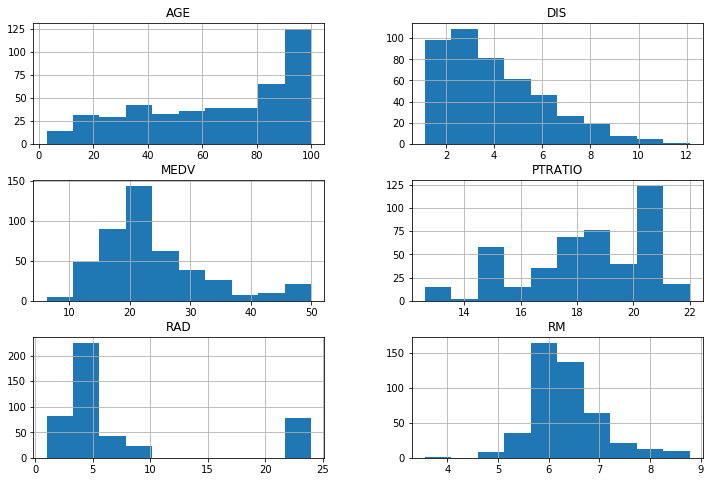

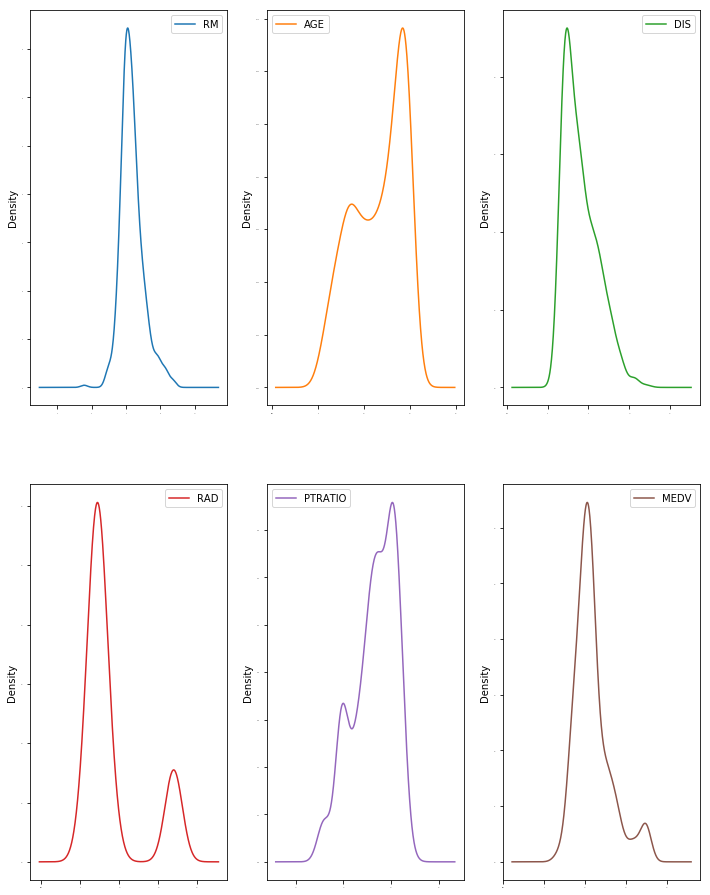

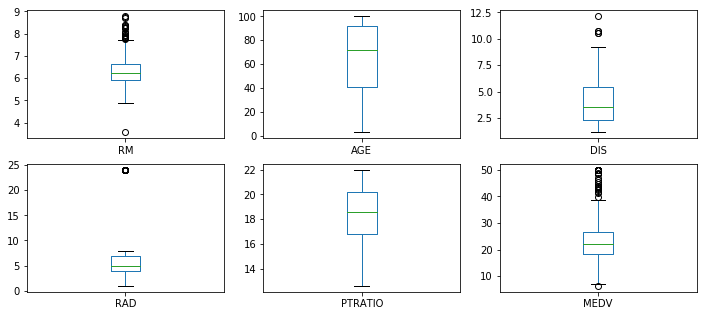

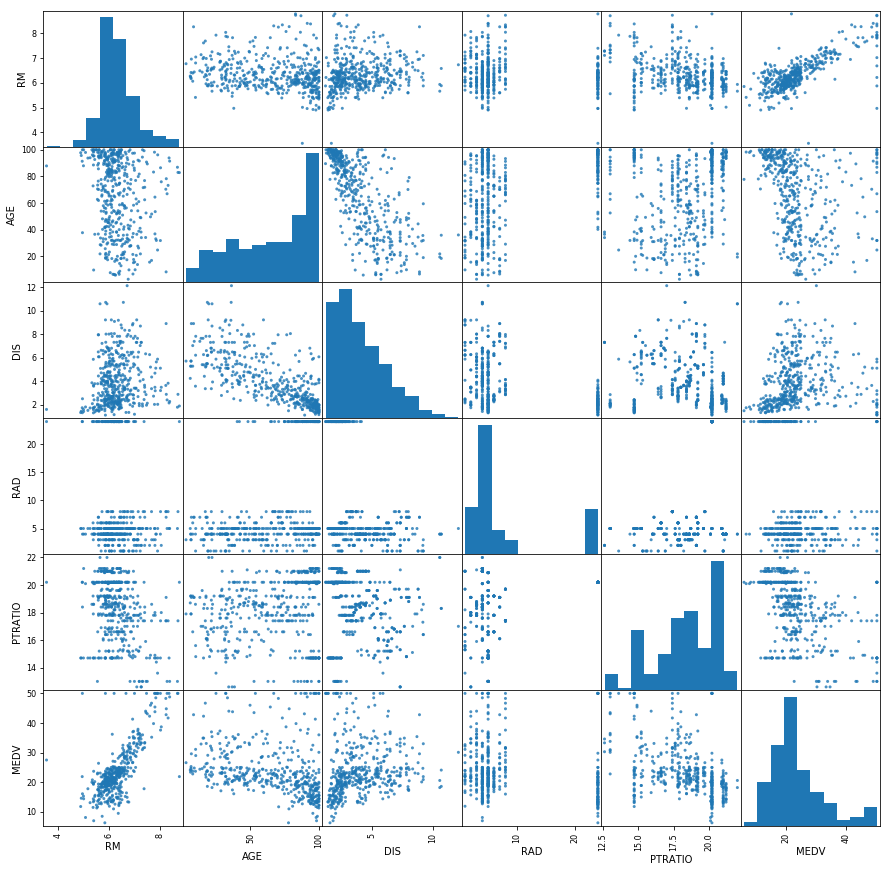

In [29]:
## EDA TWO CHARTS ##

# Plot histrogram for each numeric
df2.hist(figsize=(12, 8))
pyplot.show()
print('\n')

# Density plots
# IMPORTANT NOTES: 5 numeric variables -> at Least 5 plots -> Layout (2, 3): 2 rows, each row with 3 plots
df2.plot(kind='density', subplots=True, layout=(2, 3), sharex=False, legend=True, fontsize=1,
figsize=(12, 16))
pyplot.show()
print('\n')

df2.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(12,8))
pyplot.show()
print('\n')

# scatter plot matrix
scatter_matrix(df2, alpha=0.8, figsize=(15, 15))
pyplot.show()

In [30]:
## SEPARATE DATASET INTO INTPUT AND OUTPUT ARRAYS ##

# Store dataframe values into a numpy array
array = df2.values

# separate array into input and output components by slicing
# For X (input)[:, 5] --> all the rows, columns from 0 - 4 (5 - 1)
X = array[:,0:5]

# For Y (output)[:, 5] --> all the rows, column index 5 (Last column)
Y = array[:,5]

In [31]:
## SPLIT INPUT/OUTPUT INTO TRAINING/TESTING DATASETS ##

# Split the dataset --> training sub-dataset: 67%; test sub-dataset:
test_size = 0.33

# Selection of records to include in which sub-dataset must be done randomly
# use this seed for randomization

seed = 7

# Split the dataset (both input & outout) into training/testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

In [32]:
## BUILD AND TRAIN MODEL ##

# Build the model
model = DecisionTreeRegressor()

# Train the model using the training sub-dataset
model.fit(X_train,Y_train)

# Non-Linear --> NO coefficients and the intercept
DecisionTreeRegressor (criterion='mse', max_depth=None, max_features=None,
max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.0 ,presort=False, random_state=None,
splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [33]:
## CALC R-SQUARED ##

R_squared = model.score(X_test, Y_test)
print(R_squared)

0.4578931566069959


In [ ]:
#### THATS NOT CLOSE TO THE MATERIAL .546254070


In [34]:
## PREDICTION ##

model.predict([[6.0, 55, 5, 2, 16]])

array([19.])

In [35]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 10

# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7

# Split the whole data set into folds
kfold = KFold(n_splits=num_folds, random_state=seed)

# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm
scoring = 'neg_mean_squared_error'

# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# Print out the evaluation results
# Result: the average of all the results obtained from the k-foLd cross-validation
print(results.mean())

-39.924326086956526
